

# Why Do Brazilians Not Show Up for Appointments?
### Investigating a Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset presents us with information on over 110,000 medical appointments in Brazil. Brazil has a big problem with missed appointments, with around 1 in 5 people failing to show up. 

We are provided with an array of factors such as ID numbers, patient Age, Gender, ScheduledDay (day appointment was scheduled), AppointmentDay, Neighbourhood (where the appointment was to take place), We then have binary columns for factors such as whether the patient is on scholarship, whether they suffer from Alcoholism, Diabetes, or Hypertention, or whether they have any Handicaps. Finally, there is data on whether or not the patient received a reminder SMS, and whether or not they missed their appointment.

Some of the questions I plan to explore with this data set are:
<ol>
    <li>Does age play a factor in predicting whether the patient will show up?</li> 
    <li>Are men or women more likely to not show?</li>
    <li>Does location matter?</li>
    <li>Do the SMS reminders actually work?</li>
</ol>

#### Let's import our packages and start exploring

In [5]:
#importing any packages we may need and using the magic word to allow us to view visualizations in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 Let's load up the data and check it out

### General Properties

In [6]:
# importing the data from the .csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(25)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [7]:
# check info and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
#check for duplicates
df.duplicated().sum()

0

Let's visualize the distributions of the data in each column.

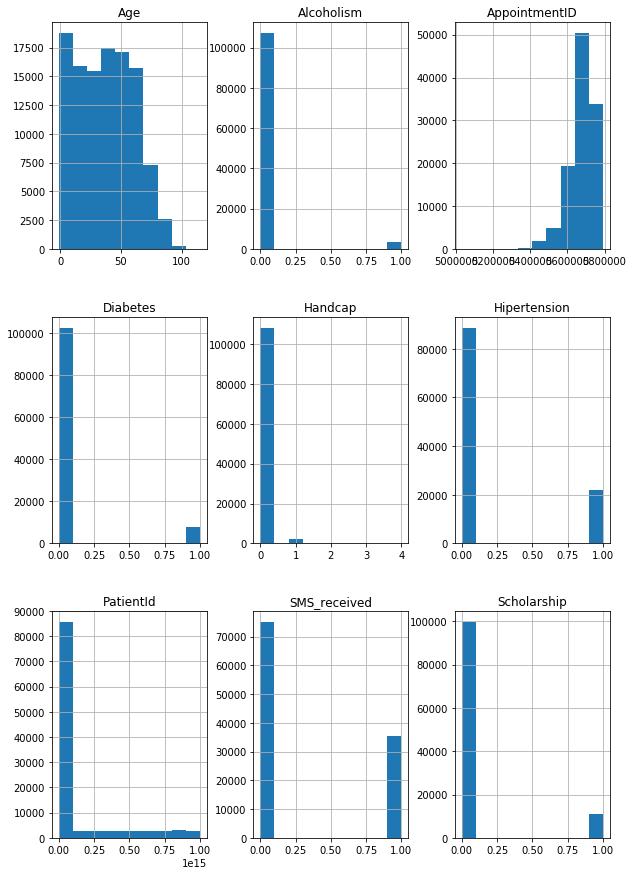

In [9]:
#view distributions for numerical columns
df.hist(figsize=(10,15));

In [10]:
#view some stats
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#view number of unique values per column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
#Handcap column has more than two values. Let's explore that
df.Handcap.unique()

array([0, 1, 2, 3, 4])

Let's get the percentage for the No-shows for the whole dataset.

In [13]:
# Get the percentage of value counts in the "No-show" column
df['No-show'].value_counts(normalize=True) * 100

No     79.806744
Yes    20.193256
Name: No-show, dtype: float64

This is quite a large dataset, with over 110 thousand rows. Fortunately, there are no missing or duplicated values.  Most of the columns are binary. However, there are some issues that need to be addressed. The Handcap column has values from 0-4, however, the documentation suggests that this is meant to be another binary column, and that any entrys other than zero or 1 were entered erroneously.  We will account for this by considering any value greater than zero to mean the person did have a disability. The ScheduledDay and AppointmentDay columns are currently in strings and will need to be converted to datetimes.



### Data Cleaning

Let's change the date columns from strongs to datetimes. We'll also correct the misspelled column names for the sake of aesthetics,

In [14]:
#rename mispelled columns
df.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#change dtypes
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


OK, our data should now be ready to analyze.

<a id='eda'></a>
## Exploratory Data Analysis




### Does Age help us predict whether a patient will show up to their appointment?

Lets break the patients into two groups, showed and missed

In [16]:
# create masks for the values in the "no-show" column
showed = df['No-show'] == "No"
missed = df['No-show'] == "Yes"

Now let's break down the ages

In [17]:
# Find average age of those who missed appointments
df.Age[missed].mean()

34.317666562121957

In [18]:
# Find average age of those who showed up for appointments
df.Age[showed].mean()

37.790064393252315

In [19]:
# Compare to average age of the dataset
df.Age.mean()

37.088874211731067

It looks like patients who miss appointments tend to be younger.  Lets explore this a little more with a visualization to see the distribution.

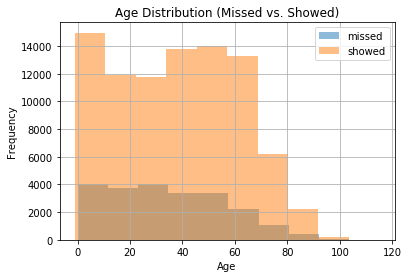

In [31]:
# create a histogram for the age data
df.Age[missed].hist(alpha=0.5, label='missed')
df.Age[showed].hist(alpha=0.5, label='showed')
plt.title('Age Distribution (Missed vs. Showed)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend();

We see above that the ages for both missed and showed groups follow a similar pattern, but there is a clear difference in shape for younger people, between 18 and 35.  there is a dip in the number of people who showed up in this age range, while it spikes in the group that did not show up.

### What about other factors? 

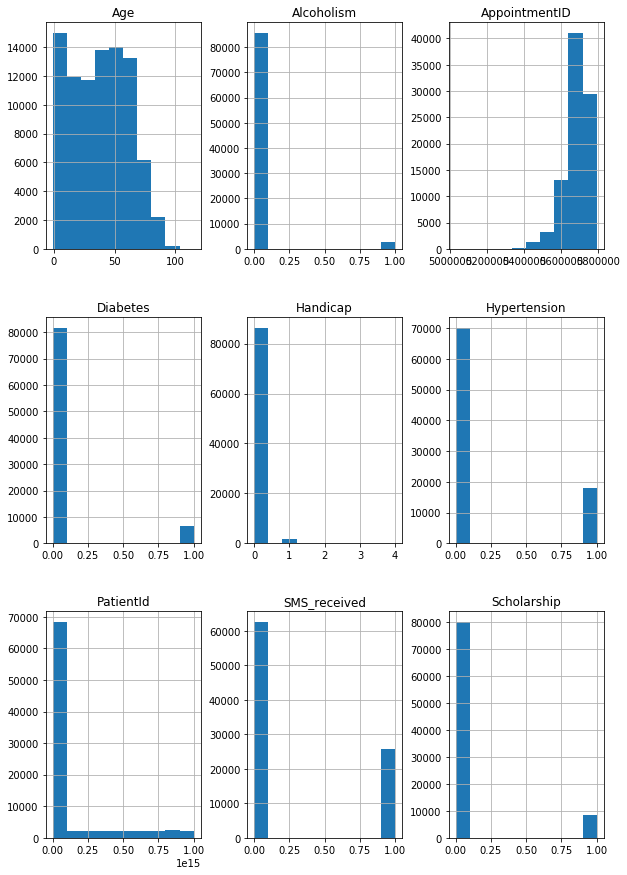

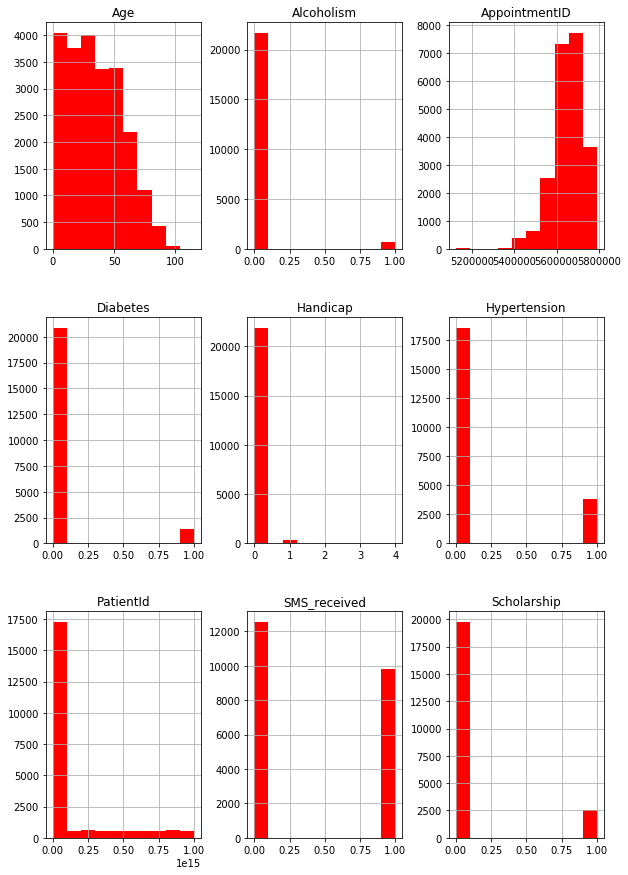

In [33]:
# show distributions for the "missed" and "showed" groups
df[showed].hist(figsize=(10,15), label='Showed');
df[missed].hist(figsize=(10,15), label='Missed', color='red');

When we look at the above histograms, we see that many of the ditributions appear to be the same across each group. The two exceptions to this are Age, which confirms the work we did above, and somewhat counterintuitively, SMS reminders. 

#### Let's explore this SMS phenonmenon

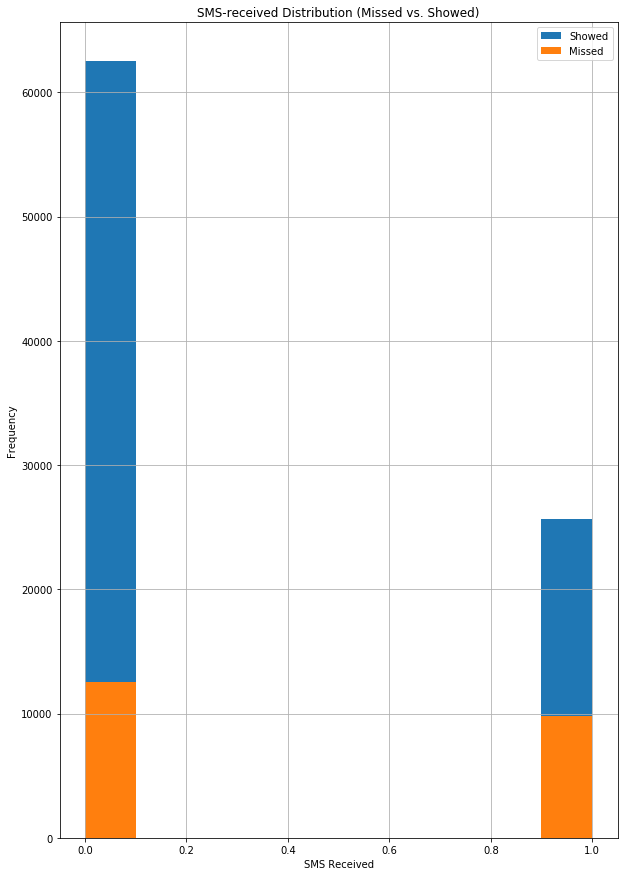

In [34]:
# compare the distributions of the SMS data
df.SMS_received[showed].hist(figsize=(10,15), label='Showed')
df.SMS_received[missed].hist(figsize=(10,15), label='Missed')
plt.title('SMS-received Distribution (Missed vs. Showed)')
plt.xlabel('SMS Received')
plt.ylabel('Frequency')
plt.legend();

Looking at the visualization above, there is a correlation here.  Ironically, patients who missed their appointment received an SMS reminder about their appointments at a much higher percentage than those patients who did not miss their appointment.  The data can't tell us why this is the case, but the correlation says it might be worth investigating.

### Are women or men more likely to show up?

Let's explore if there is a correlation between Gender and No-shows

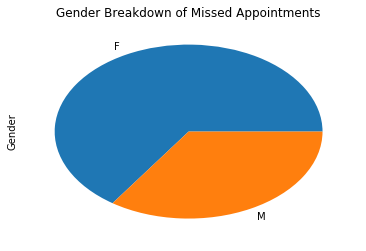

In [35]:
# show pie plot for missed appointments by gender
df.Gender[missed].value_counts().plot(kind='pie')
plt.title('Gender Breakdown of Missed Appointments');

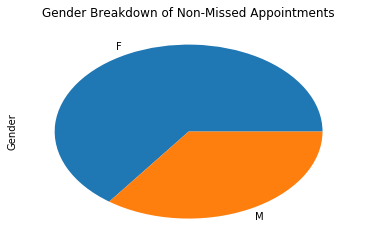

In [36]:
# compare to gender distribution for non-missed appointments
df.Gender[showed].value_counts().plot(kind='pie')
plt.title('Gender Breakdown of Non-Missed Appointments');

When we look at gender distribution, there doesn't seem to be much of a difference there between those who showed and those who didn't.  The battel of the sexes wil have to continue another day. This one is a draw.

### What about the Neighbourhoods?

Let's now look at the distribution of missed appointments per location

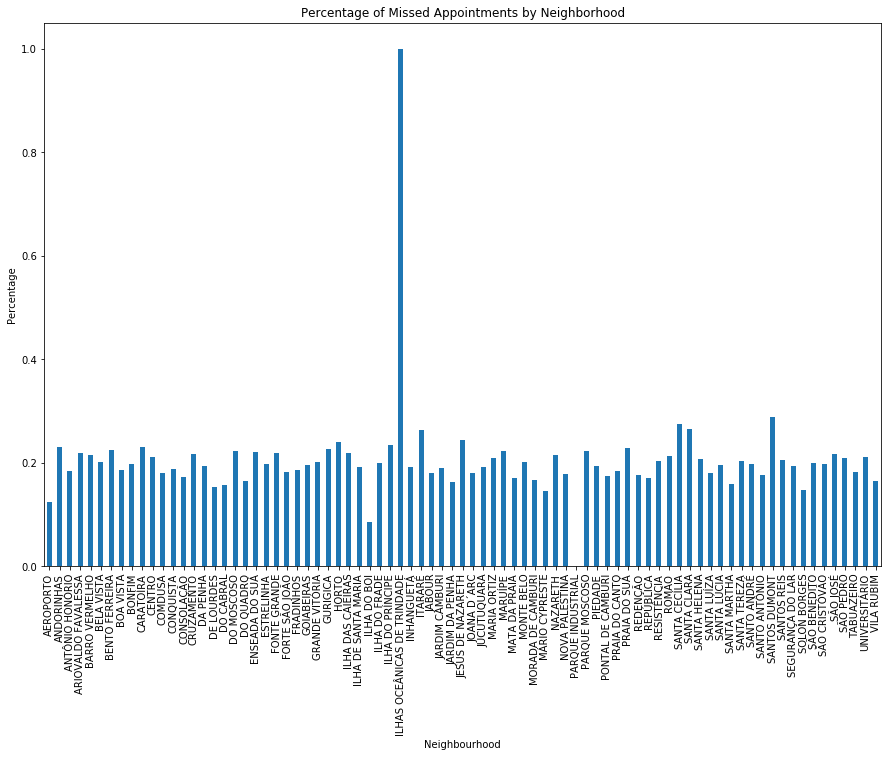

In [37]:
#create bar graph for percentage of missed appointments per location
missed_pct_location = df.Neighbourhood[missed].value_counts() / df.Neighbourhood.value_counts()
missed_pct_location.plot(figsize=(15,10), kind='bar')
plt.title('Percentage of Missed Appointments by Neighborhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage');

Looking at the plot above, we can see the percentages of missed appointments broken up by location. with the exception of a few locations with very few data points (those with 100% or 0% will be ignored), most of the no-shows are pretty evenly distributed across all the locations, so this is a problem everywhere. However, some locations fall well below and above the average of just over 20%.  Let's look at ILHA DO BOI and SANTOS DUMONT. 

In [26]:
#look specifically at "ILHA DO BOI"
df[missed].query('Neighbourhood == "ILHA DO BOI"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
1575,4.581276e+13,5586680,F,2016-04-15 07:50:55,2016-04-29,57,ILHA DO BOI,0,0,0,0,0,1,Yes
39791,1.792367e+13,5649413,F,2016-05-03 06:41:51,2016-05-04,20,ILHA DO BOI,0,0,0,0,0,0,Yes
62040,3.226748e+13,5749592,F,2016-05-31 07:59:53,2016-05-31,31,ILHA DO BOI,0,0,0,0,0,0,Yes


In [27]:
#count how many total appointments were made there
df.query('Neighbourhood == "ILHA DO BOI"').count()

PatientId         35
AppointmentID     35
Gender            35
ScheduledDay      35
AppointmentDay    35
Age               35
Neighbourhood     35
Scholarship       35
Hypertension      35
Diabetes          35
Alcoholism        35
Handicap          35
SMS_received      35
No-show           35
dtype: int64

When we look at ILHA DO BOI appointments, the chart shows us that they have one of the lowest rates of missed appointments, so it might be worth taking a deeper look at to see if they are doing anything different. However, upon further review, only 35 appointments were booked at this location, and only 3 of those were no-shows. Unfortunately, that likely isn't enough data to be able to draw any conclusions from.

Let's check out SANTOS DUMONT, which has over 1200 appointments and can give us more insights.


In [28]:
# find out percentage of missed appointments at "SANTOS DUMONT"
sd1 = df.query('Neighbourhood == "SANTOS DUMONT"').count()
sd2 = df[missed].query('Neighbourhood == "SANTOS DUMONT"').count()
sd_pct = sd2 / sd1
sd_pct

PatientId         0.289185
AppointmentID     0.289185
Gender            0.289185
ScheduledDay      0.289185
AppointmentDay    0.289185
Age               0.289185
Neighbourhood     0.289185
Scholarship       0.289185
Hypertension      0.289185
Diabetes          0.289185
Alcoholism        0.289185
Handicap          0.289185
SMS_received      0.289185
No-show           0.289185
dtype: float64

The no-show rate at this location is almost 29%. This is significantly higher than the 20% for the dataset as a whole. It may be worth looking into this location to see if there are any characteristics that might be contributing to more missed appointments there.

## Limitations

We must exercise caution before drawing conclusions. There are many things that the data does not provide us.  For example, many of the apoointments listed are for children, and any missed appointments for these children would liely be the fault of the adult responsible for them, but we do not have any data on these responsible adults.  Furthermore, all the neighborhoods and the hadicaps may offer different challenges, thus it may not be a true apples-to-apples comparison for each patient. 


<a id='conclusions'></a>
## Conclusions

This dataset gives us many factors to consider as we look for correlations with missed appointments. It appears that the most relevant factors may be Age, the location the appointment was scheduled for, and whether an SMS reminder was received. 

We saw that there were a higer ditribution of young people in the group that missed their appointments than in the group that showed up. 

We looked at the Gender breakdown for each group, and saw that they looked nearly identical, so there is likely no correlation there.

Ironically, the No-shows had a much higher rate of receiveing SMS reminders than the group that showed. The data can't tell us why this is, so a more qualitative study would need to be done to determine whether this is coincidental, or if there was something with the SMS process that needs to be refined. 

The location can also play a role. As we saw in the example, some locations have a much higher percentage of missed appointments that the overall dataset. 

It is important to note that these are merely correlations, and that it can not be assumed that someone will miss an appointment if they are 30 years old, booked for the SANTOS DUMONT location, and recieved an SMS reminder. The data can only show us trends, and further investigation is always needed when trying to determine whether a factor may be truly relevant. 




## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0